In [1]:
### Network Slicing Recognition

About Dataset

The telecom industry is going through a massive digital transformation with the adoption of ML, AI, feedback-based automation and advanced analytics to handle the next generation applications and services. AI concepts are not new; the algorithms used by Machine Learning and Deep Learning are being currently implemented in various industries and technology verticals. With growing data and immense volume <br>

of information over 5G, the ability to predict data proactively, swiftly and with accuracy, is critically important. Data-driven decision making will be vital in future communication networks due to the traffic explosion and Artificial Intelligence (AI) will accelerate the 5G network performance. <br>

Mobile operators are looking for a programmable solution that will allow them to accommodate multiple independent tenants on the same physical infrastructure and 5G networks allow for end-to-end network resource allocation using the concept of Network Slicing (NS). <br>

Network Slicing will play a vital role in enabling a multitude of 5G applications, use cases, and services. Network slicing functions will provide an end-to-end isolation between slices with an ability to customize each slice based on the service demands (bandwidth, coverage, security, latency, reliability, etc). <br>

Your Task is to build a Machine Learning model that will be able to to proactively detect and eliminate threats based on incoming connections thereby selecting the most appropriate network slice, even in case of a network failure. <br>

**Dataset Description** <br>
LTE/5g - User Equipment categories or classes to define the performance specifications <br>
Packet Loss Rate - number of packets not received divided by the total number of packets sent. <br>
Packet Delay - The time for a packet to be received. <br>
Slice type - network configuration that allows multiple networks (virtualized and independent) <br>
GBR - Guaranteed Bit Rate <br>
Healthcare - Usage in Healthcare (1 or 0) <br>
Industry 4.0 - Usage in Digital Enterprises(1 or 0) <br>
IoT Devices - Usage <br>
Public Safety - Usage for public welfare and safety purposes (1 or 0) <br>
Smart City & Home - usage in daily household chores <br>
Smart Transportation - usage in public transportation <br>
Smartphone - whether used for smartphone cellular data <br>

In [2]:
###!mkdir ~/.kaggle

In [3]:
###!cp /kaggle.json ~/.kaggle/

In [4]:
###!chmod 600 ~/.kaggle/kaggle.json

In [5]:
###! pip install kaggle

In [ ]:
###!kaggle datasets download -d gauravduttakiit/network-slicing-recognition

In [ ]:
###! unzip /content/network-slicing-recognition.zip

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('setup Completed^___^')

setup Completed^___^


In [ ]:
###! pip install --upgrade pandas

In [11]:
train = pd.read_csv('/content/train_dataset.csv')
train.head(2)

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1


In [12]:
test = pd.read_csv('/content/test_dataset.csv')
test.head(2)

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,15,17,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0
1,14,18,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0


In [13]:
train["IoT Devices"].value_counts()

0    29755
1     1828
Name: IoT Devices, dtype: int64

In [14]:
print(train.columns)
print(test.columns)

Index(['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT',
       'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone', 'slice Type'],
      dtype='object')
Index(['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT',
       'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone'],
      dtype='object')


In [113]:
train.dtypes

lte_5g_category            int8
time                       int8
packet_loss_rate        float32
packet_delay              int16
io_t                       int8
lte_5g                     int8
gbr                        int8
non_gbr                    int8
ar_vr_gaming               int8
healthcare                 int8
industry_4_0               int8
io_t_devices               int8
public_safety              int8
smart_city_and_home        int8
smart_transportation       int8
smartphone                 int8
slice_type                 int8
dtype: object

In [ ]:
###! pip install klib

In [16]:
import klib

In [17]:
train = klib.data_cleaning(train)

Shape of cleaned data: (8958, 17) - Remaining NAs: 0


Dropped rows: 22625
     of which 22625 duplicates. (Rows (first 150 shown): [99, 250, 289, 305, 334, 362, 431, 446, 457, 461, 504, 509, 517, 529, 534, 585, 623, 636, 639, 660, 667, 677, 680, 756, 774, 794, 802, 813, 833, 840, 868, 878, 884, 903, 904, 917, 925, 927, 938, 949, 982, 1009, 1019, 1034, 1035, 1039, 1043, 1046, 1060, 1063, 1065, 1079, 1081, 1085, 1091, 1101, 1103, 1111, 1117, 1123, 1129, 1131, 1136, 1139, 1169, 1172, 1181, 1228, 1229, 1236, 1241, 1254, 1255, 1280, 1290, 1291, 1293, 1313, 1320, 1324, 1325, 1347, 1348, 1351, 1355, 1388, 1390, 1394, 1397, 1414, 1421, 1424, 1432, 1442, 1445, 1452, 1455, 1460, 1472, 1482, 1486, 1498, 1505, 1509, 1513, 1524, 1527, 1536, 1539, 1540, 1550, 1559, 1563, 1565, 1575, 1577, 1583, 1587, 1600, 1611, 1614, 1619, 1630, 1654, 1660, 1662, 1663, 1664, 1670, 1674, 1678, 1679, 1681, 1683, 1684, 1686, 1690, 1691, 1696, 1705, 1706, 1709, 1715, 1719, 1731, 1733, 1742, 1754, 1757, 1759])

Dropped

In [18]:
test = klib.data_cleaning(test)

Shape of cleaned data: (8960, 16) - Remaining NAs: 0


Dropped rows: 22624
     of which 22624 duplicates. (Rows (first 150 shown): [130, 182, 275, 279, 306, 367, 379, 396, 420, 468, 555, 560, 576, 582, 603, 614, 618, 621, 625, 635, 638, 641, 646, 655, 680, 705, 710, 717, 741, 749, 776, 786, 788, 789, 793, 837, 842, 848, 857, 875, 884, 913, 919, 928, 947, 948, 965, 981, 988, 1015, 1022, 1024, 1030, 1035, 1036, 1077, 1081, 1108, 1118, 1131, 1139, 1140, 1152, 1153, 1161, 1168, 1178, 1183, 1192, 1199, 1201, 1203, 1209, 1210, 1211, 1229, 1250, 1255, 1257, 1262, 1267, 1276, 1277, 1282, 1300, 1305, 1313, 1329, 1334, 1337, 1357, 1361, 1377, 1401, 1402, 1409, 1422, 1424, 1441, 1445, 1450, 1451, 1459, 1466, 1478, 1480, 1496, 1503, 1516, 1523, 1527, 1529, 1535, 1540, 1542, 1546, 1549, 1551, 1558, 1569, 1570, 1574, 1576, 1592, 1596, 1599, 1608, 1609, 1616, 1623, 1625, 1627, 1630, 1636, 1638, 1643, 1644, 1647, 1661, 1664, 1670, 1681, 1682, 1685, 1699, 1709, 1711, 1716, 1721, 1726])

Dropped column

In [19]:
train = klib.convert_datatypes(train)

In [20]:
test = klib.convert_datatypes(test)

In [21]:
train.dtypes

lte_5g_category            int8
time                       int8
packet_loss_rate        float32
packet_delay              int16
io_t                       int8
lte_5g                     int8
gbr                        int8
non_gbr                    int8
ar_vr_gaming               int8
healthcare                 int8
industry_4_0               int8
io_t_devices               int8
public_safety              int8
smart_city_and_home        int8
smart_transportation       int8
smartphone                 int8
slice_type                 int8
dtype: object

In [22]:
klib.cat_plot(train)

No columns with categorical data were detected.


In [23]:
klib.corr_mat(train)

,lte_5g_category,time,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone,slice_type
lte_5g_category,1.00,-0.00,0.01,-0.02,0.08,-0.08,-0.01,0.01,-0.03,0.02,0.03,0.02,0.02,0.03,0.02,-0.07,0.08
time,-0.00,1.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
packet_loss_rate,0.01,0.00,1.00,0.31,0.17,-0.17,-0.01,0.01,-0.17,-0.18,-0.22,0.39,-0.18,0.58,-0.18,-0.07,-0.10
packet_delay,-0.02,0.00,0.31,1.00,-0.19,0.19,0.43,-0.43,-0.13,-0.24,-0.29,0.43,-0.24,0.21,-0.25,0.28,-0.40
io_t,0.08,0.00,0.17,-0.19,1.00,-1.00,-0.13,0.13,-0.32,0.27,0.39,0.26,0.27,0.39,0.27,-0.81,0.91
lte_5g,-0.08,-0.00,-0.17,0.19,-1.00,1.00,0.13,-0.13,0.32,-0.27,-0.39,-0.26,-0.27,-0.39,-0.27,0.81,-0.91
gbr,-0.01,0.00,-0.01,0.43,-0.13,0.13,1.00,-1.00,0.04,-0.22,0.04,0.28,-0.22,0.04,-0.22,0.10,-0.33
non_gbr,0.01,-0.00,0.01,-0.43,0.13,-0.13,-1.00,1.00,-0.04,0.22,-0.04,-0.28,0.22,-0.04,0.22,-0.10,0.33
ar_vr_gaming,-0.03,-0.00,-0.17,-0.13,-0.32,0.32,0.04,-0.04,1.00,-0.09,-0.13,-0.09,-0.09,-0.13,-0.09,-0.30,-0.29
healthcare,0.02,-0.00,-0.18,-0.24,0.27,-0.27,-0.22,0.22,-0.09,1.00,-0.09,-0.06,-0.06,-0.09,-0.06,-0.21,0.39


<Axes: xlabel='slice_type', ylabel='Density'>

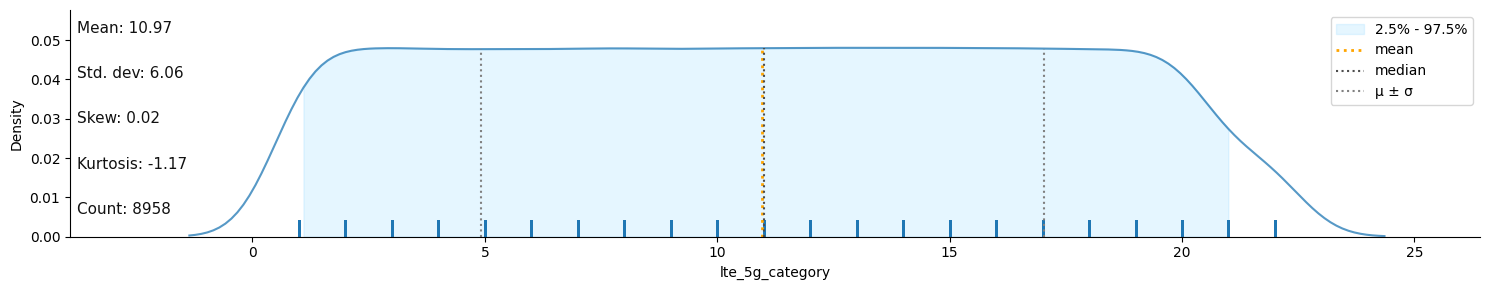

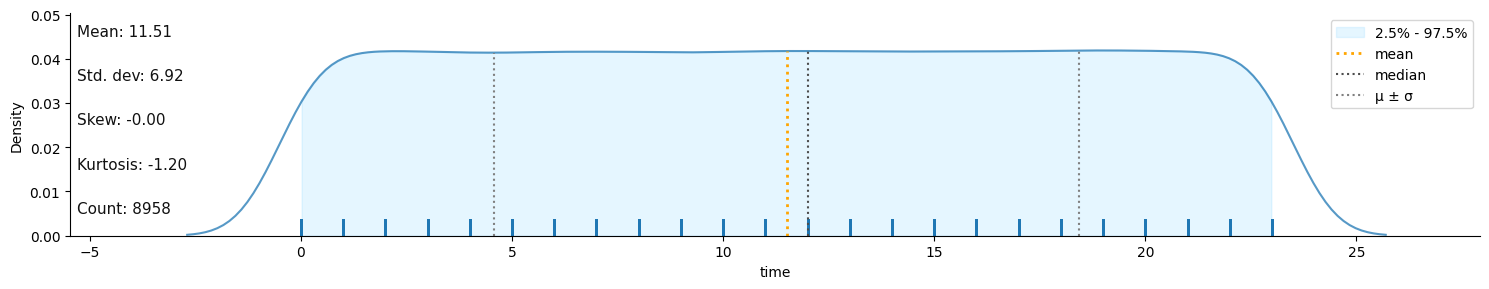

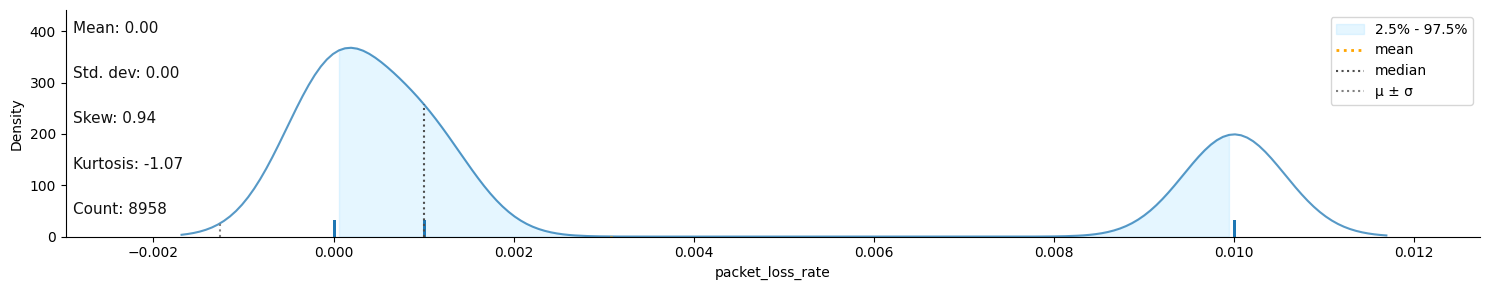

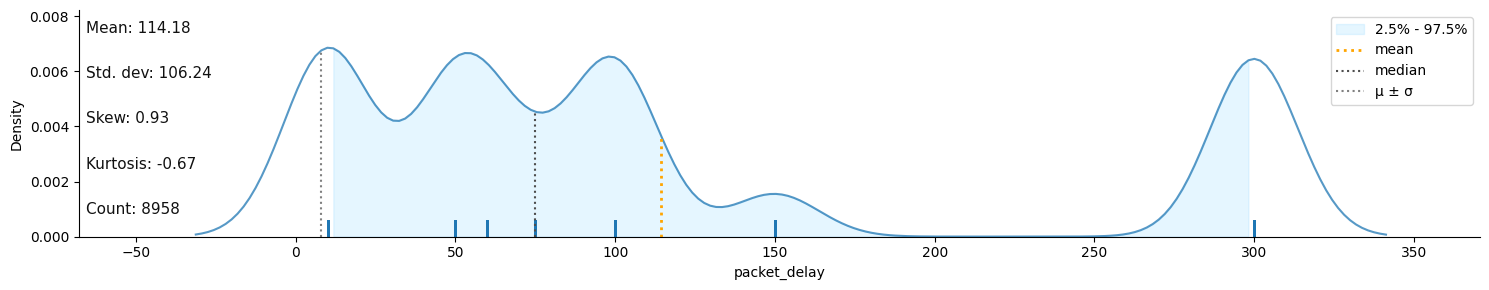

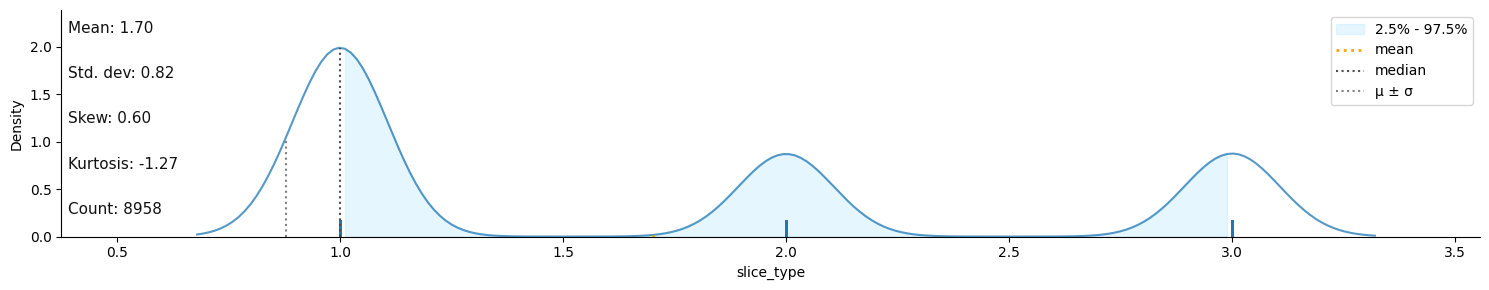

In [24]:
klib.dist_plot(train)

In [25]:
klib.missingval_plot(train)

No missing values found in the dataset.


In [26]:
##! pip install mlxtend

In [27]:
train.columns

Index(['lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay', 'io_t',
       'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [28]:
num_var = [feature for feature in train.columns if train[feature].dtypes != 'O']
discrete_var = [feature for feature in num_var if len(train[feature].unique()) <= 25]
cont_var = [feature for feature in num_var if feature not in discrete_var]
categ_var = [feature for feature in train.columns if feature not in num_var]

In [29]:
print("The Numerical Columns :", num_var, 
      "The discreate Columns :", discrete_var, 
      "The continuous Columns :", cont_var, 
      "The categorical Columns :",categ_var)

The Numerical Columns : ['lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home', 'smart_transportation', 'smartphone', 'slice_type'] The discreate Columns : ['lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home', 'smart_transportation', 'smartphone', 'slice_type'] The continuous Columns : [] The categorical Columns : []


In [30]:
def find_var_type(var):
    

    if var in discrete_var:
        print("{} is a Numerical Variable, Discrete in nature".format(var))
    elif var in cont_var :
        print("{} is a Numerical Variable, Continuous in nature".format(var))
    else :
        print("{} is a Categorical Variable".format(var))

In [31]:
print("The continuous variables are :", cont_var)
print("The categorical variables are :", categ_var)

The continuous variables are : []
The categorical variables are : []


In [32]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

lte_5g_category          10.000000
time                     12.000000
packet_loss_rate          0.009999
packet_delay            100.000000
io_t                      1.000000
lte_5g                    1.000000
gbr                       1.000000
non_gbr                   1.000000
ar_vr_gaming              0.000000
healthcare                0.000000
industry_4_0              0.000000
io_t_devices              0.000000
public_safety             0.000000
smart_city_and_home       0.000000
smart_transportation      0.000000
smartphone                1.000000
slice_type                1.000000
dtype: float64


In [33]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

lte_5g_category          10.000000
time                     12.000000
packet_loss_rate          0.009999
packet_delay            100.000000
io_t                      1.000000
lte_5g                    1.000000
gbr                       1.000000
non_gbr                   1.000000
ar_vr_gaming              0.000000
healthcare                0.000000
industry_4_0              0.000000
io_t_devices              0.000000
public_safety             0.000000
smart_city_and_home       0.000000
smart_transportation      0.000000
smartphone                1.000000
slice_type                1.000000
dtype: float64


In [34]:
test.columns

Index(['lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay', 'io_t',
       'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object')

In [35]:
test["slice_type"] = 0

In [36]:
train.columns

Index(['lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay', 'io_t',
       'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [37]:
train["slice_type"].value_counts()

1    4772
3    2098
2    2088
Name: slice_type, dtype: int64

In [38]:
X_train = train.drop(columns = "slice_type")

In [39]:
X_test = test.drop(columns = "slice_type")

In [40]:
y_train = train["slice_type"]

In [41]:
y_test = test["slice_type"]

In [42]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_scaler_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_scaler_train.head()

,lte_5g_category,time,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone
0,0.3,-1.000000,-0.09991,-0.65,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.7,0.666667,0.00000,0.25,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.6,0.166667,-0.09991,2.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.8,0.416667,0.90009,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.2,-0.666667,0.90009,-0.25,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
X_scaler_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
X_scaler_test.head()

,lte_5g_category,time,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone
0,0.4,0.408163,0.00000,0.25,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.3,0.489796,-0.09991,-0.65,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,-0.408163,0.00000,-0.25,1.0,-1.0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.9,0.163265,0.00000,-0.25,1.0,-1.0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.9,0.816327,0.00000,-0.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
print(X_scaler_train.shape, X_scaler_test.shape)
print(y_train.shape, y_test.shape)

(8958, 16) (8960, 16)
(8958,) (8960,)


In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [47]:
print(model.feature_importances_)


[2.06758238e-05 3.63599101e-08 7.80159712e-02 6.94973944e-02
 2.97473790e-01 1.95934415e-01 6.70491183e-02 8.44892465e-02
 1.86110388e-02 5.64888748e-03 9.39961409e-03 1.12343831e-02
 3.21413826e-03 7.77708638e-02 7.16988517e-03 7.44705418e-02]


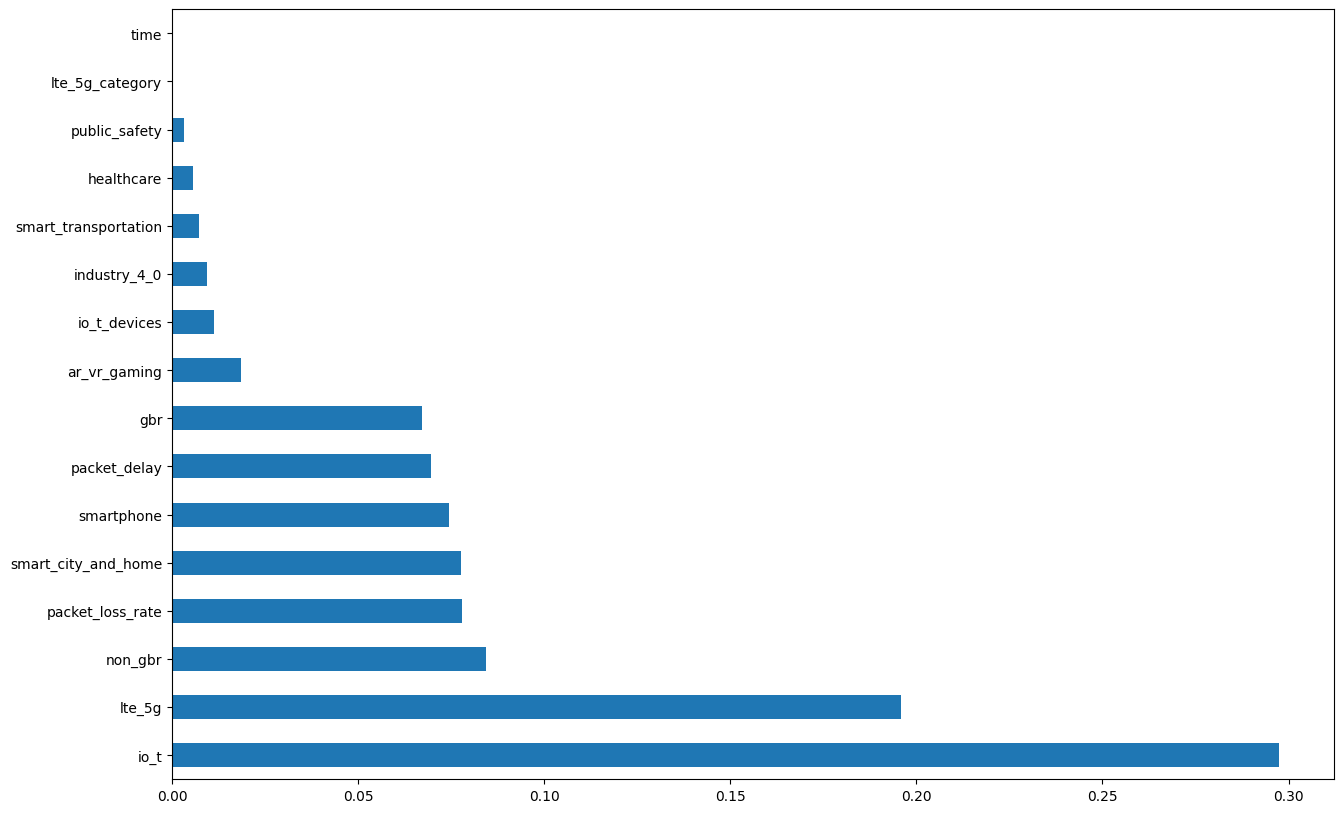

In [48]:
plt.figure(figsize = [15,10])
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [49]:
X_train.corr()

,lte_5g_category,time,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone
lte_5g_category,1.000000,-0.000883,0.014919,-0.015346,0.083488,-0.083488,-0.009673,0.009673,-0.027743,0.021993,0.033045,0.022474,0.021208,0.033184,0.021236,-0.066915
time,-0.000883,1.000000,0.000984,0.001302,0.001612,-0.001612,0.000216,-0.000216,-0.000386,-0.000010,0.000312,0.002650,0.000608,-0.000290,0.000159,-0.001385
packet_loss_rate,0.014919,0.000984,1.000000,0.310946,0.167889,-0.167889,-0.014765,0.014765,-0.165734,-0.176833,-0.216224,0.394824,-0.176833,0.578566,-0.177370,-0.065912
packet_delay,-0.015346,0.001302,0.310946,1.000000,-0.193956,0.193956,0.428456,-0.428456,-0.127318,-0.244449,-0.288221,0.433778,-0.244449,0.208454,-0.245191,0.275193
io_t,0.083488,0.001612,0.167889,-0.193956,1.000000,-1.000000,-0.126712,0.126712,-0.323727,0.266133,0.388426,0.264782,0.266133,0.388006,0.266942,-0.806840
lte_5g,-0.083488,-0.001612,-0.167889,0.193956,-1.000000,1.000000,0.126712,-0.126712,0.323727,-0.266133,-0.388426,-0.264782,-0.266133,-0.388006,-0.266942,0.806840
gbr,-0.009673,0.000216,-0.014765,0.428456,-0.126712,0.126712,1.000000,-1.000000,0.041602,-0.221519,0.043371,0.279047,-0.221519,0.043324,-0.222191,0.101873
non_gbr,0.009673,-0.000216,0.014765,-0.428456,0.126712,-0.126712,-1.000000,1.000000,-0.041602,0.221519,-0.043371,-0.279047,0.221519,-0.043324,0.222191,-0.101873
ar_vr_gaming,-0.027743,-0.000386,-0.165734,-0.127318,-0.323727,0.323727,0.041602,-0.041602,1.000000,-0.086155,-0.125744,-0.085717,-0.086155,-0.125608,-0.086416,-0.297761
healthcare,0.021993,-0.000010,-0.176833,-0.244449,0.266133,-0.266133,-0.221519,0.221519,-0.086155,1.000000,-0.090679,-0.061814,-0.062129,-0.090581,-0.062318,-0.214727


<Axes: >

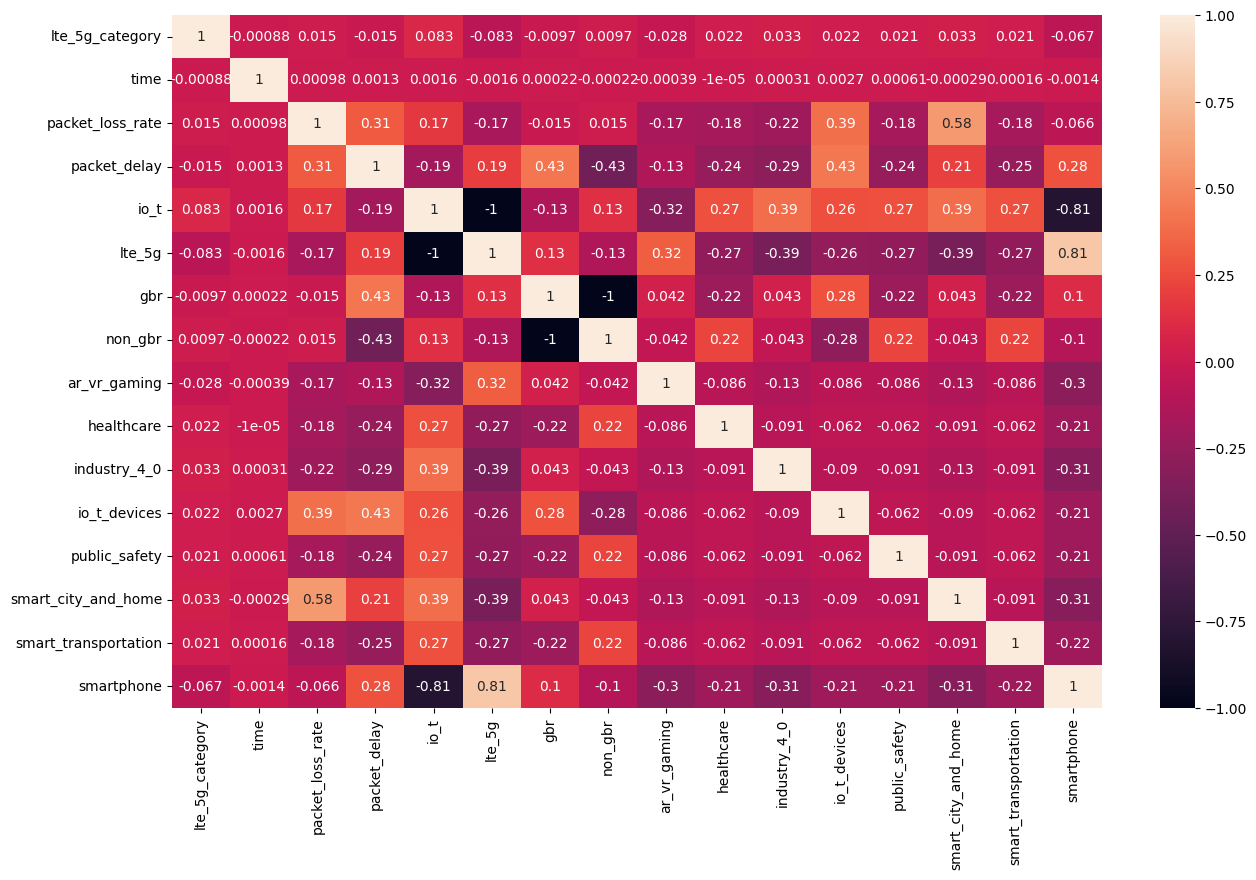

In [50]:
import seaborn as sns
corr=X_train.corr()
top_features=corr.index
plt.figure(figsize=(15,9))
sns.heatmap(X_train[top_features].corr(),annot=True)


In [51]:
threshold=0.8

In [52]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [53]:
correlation(X_train,threshold)

{'lte_5g', 'non_gbr', 'smartphone'}

In [54]:
X_train = X_train.drop(columns = ['lte_5g', 'non_gbr', 'smartphone'])

In [55]:
X_test = X_test.drop(columns = ['lte_5g', 'non_gbr', 'smartphone'])

In [56]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8958, 13) (8958,)
(8960, 13) (8960,)


In [59]:
logisticr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgbc = XGBClassifier()
adac = AdaBoostClassifier()

In [60]:
logisticr.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
#xgbc.fit(X_train, y_train)
adac.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AdaBoostClassifier()

In [61]:
ypred_logisticr= logisticr.predict(X_test)
ypred_dtc = dtc.predict(X_test)
ypred_rfc = rfc.predict(X_test)
ypred_gbc = gbc.predict(X_test)
ypred_adac = adac.predict(X_test)

In [62]:
print("The LR train score is ", logisticr.score(X_train, y_train))
print("The LR test score is ", logisticr.score(X_test, ypred_logisticr))
print("The DT train score is ", dtc.score(X_train, y_train))
print("The DT test score is ", dtc.score(X_test, ypred_dtc))
print("The RF train score is ", rfc.score(X_train, y_train))
print("The RF test score is ", rfc.score(X_test, ypred_rfc))
print("The GB train score is ", gbc.score(X_train, y_train))
print("The GB test score is ", gbc.score(X_test, ypred_gbc))
print("The AB train score is ", adac.score(X_train, y_train))
print("The AB test score is ", adac.score(X_test, ypred_adac))

The LR train score is  1.0
The LR test score is  1.0
The DT train score is  1.0
The DT test score is  1.0
The RF train score is  1.0
The RF test score is  1.0
The GB train score is  1.0
The GB test score is  1.0
The AB train score is  1.0
The AB test score is  1.0


In [ ]:
###!pip install pycaret

In [65]:
###! pip install jinja2

In [ ]:
###! pip install markupsafe==2.0.1

In [67]:
import pycaret

In [68]:
from pycaret.classification import *

In [69]:
train.columns

Index(['lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay', 'io_t',
       'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [70]:
model= setup(data= train, target= 'slice_type')

,Description,Value
0,Session id,3583
1,Target,slice_type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(8958, 17)"
5,Transformed data shape,"(8958, 17)"
6,Transformed train set shape,"(6270, 17)"
7,Transformed test set shape,"(2688, 17)"
8,Numeric features,16
9,Preprocess,True


In [71]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.2050
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0900
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0530
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0680
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0850
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4530
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2760
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.3980
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4140
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4530


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3583, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
lrclassifier = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [73]:
test.columns

Index(['lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay', 'io_t',
       'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [74]:
X_test = test.drop(columns="slice_type")

In [75]:
y_test = test["slice_type"]

In [76]:
pred_holdout = predict_model(lrclassifier, data= X_test)

In [77]:
pred_holdout

,lte_5g_category,time,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone,prediction_label,prediction_score
0,15,17,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1,0.9982
1,14,18,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,1.0000
2,11,7,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,2,0.9979
3,20,14,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,2,0.9982
4,2,22,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0,1,0.9992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8955,22,8,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3,1.0000
8956,9,3,0.010000,300,1,0,1,0,0,0,0,0,0,1,0,0,2,0.9993
8957,20,22,0.001000,150,0,1,0,1,0,0,0,0,0,0,0,1,1,0.9995
8958,20,14,0.001000,100,0,1,1,0,0,0,0,0,0,0,0,1,1,0.9993


In [78]:
pred_holdout.columns

Index(['lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay', 'io_t',
       'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'prediction_label',
       'prediction_score'],
      dtype='object')

In [79]:
pred_holdout["prediction_label"].value_counts()

1    4763
2    2100
3    2097
Name: prediction_label, dtype: int64

In [80]:
###! pip install shap

In [81]:
import shap

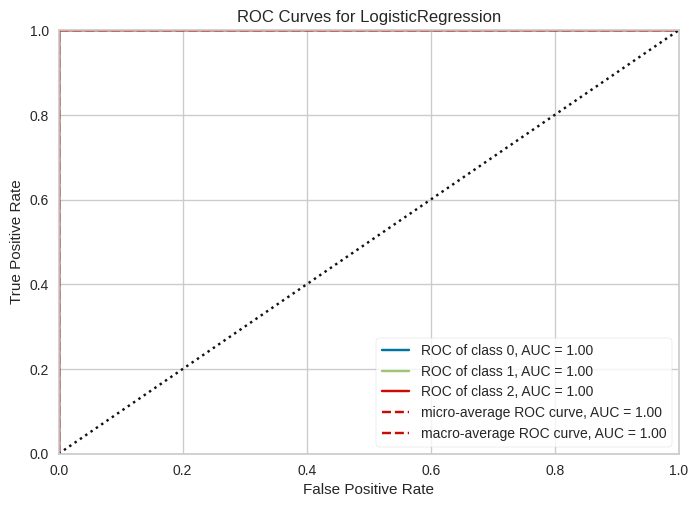

In [82]:
plot_model(lrclassifier)

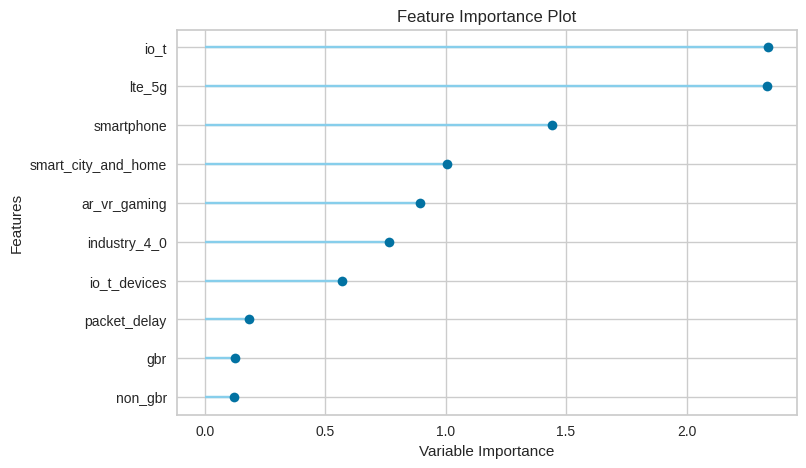

In [83]:
plot_model(lrclassifier, plot = 'feature')

In [84]:
print(lrclassifier)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3583, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [85]:
logisticrgr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1801, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
###! pip install explainerdashboard

In [87]:
train.columns

Index(['lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay', 'io_t',
       'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [114]:
train.dtypes

lte_5g_category            int8
time                       int8
packet_loss_rate        float32
packet_delay              int16
io_t                       int8
lte_5g                     int8
gbr                        int8
non_gbr                    int8
ar_vr_gaming               int8
healthcare                 int8
industry_4_0               int8
io_t_devices               int8
public_safety              int8
smart_city_and_home        int8
smart_transportation       int8
smartphone                 int8
slice_type                 int8
dtype: object

In [88]:
test.columns

Index(['lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay', 'io_t',
       'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [89]:
X_tr = train.drop(columns = "slice_type")

In [94]:
x_ts = test.drop(columns = "slice_type")

In [95]:
y_tr = train["slice_type"]

In [96]:
y_ts = test["slice_type"]

In [ ]:
logisticrgr.fit(X_tr, y_tr)

In [98]:
y_pr = logisticrgr.predict(x_ts)

In [102]:
y_pr[:100]

array([1, 3, 2, 2, 1, 1, 2, 2, 3, 1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 2, 3, 1,
       2, 3, 1, 2, 2, 1, 2, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 3, 1, 1,
       1, 1, 3, 1, 3, 1, 2, 2, 1, 1, 1, 2, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 3, 2, 2, 1, 2, 2, 1, 1, 2, 2, 3, 1, 3, 3, 1, 1, 1, 1,
       2, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1], dtype=int8)

In [103]:
y_predict = pd.DataFrame(y_pr)

In [105]:
y_predict.rename(columns = { 0 : "Predict"}, inplace=True)

In [107]:
y_predict.value_counts()

Predict
1          4763
2          2100
3          2097
dtype: int64

In [ ]:
###! pip install pickle

In [115]:
# Save the trained model as a pickle string.
import pickle 

saved_model = pickle.dump(logisticrgr, open('/content/telecom.pkl','wb'))